In [741]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import entropy

%matplotlib inline
%load_ext autoreload
%autoreload 2

from htmresearch.support.gridcells.models.grid_sp import GridPooler


n = 100
code_weight = 5
params  = {
    "columnDimensions": [n, 1],
    "potentialRadius": 100000,
    "potentialPct": 1.0,
    "globalInhibition": True,
    "localAreaDensity": -1.0,
    "numActiveColumnsPerInhArea": code_weight,
    "stimulusThreshold": 0,
    "synPermInactiveDec": 0.001,
    "synPermActiveInc": 0.005,
    "synPermConnected": 0.5,
    "minPctOverlapDutyCycle": 0.001,
    "dutyCyclePeriod": 100.,
    "boostStrength": 100.0,
    "seed": 1936
}



sp = GridPooler(num_velocity=3, **params)
sp._iterationNum = 100000
print sp._dutyCyclePeriod

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
100.0


[0 0 1 1]


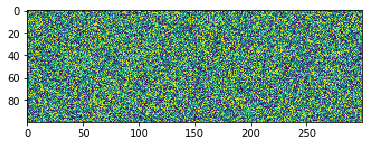

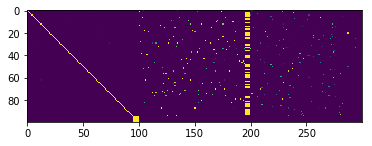

In [742]:
sp._numActiveColumnsPerInhArea = code_weight
d = 1000
epochs = 100
V = np.random.choice([0,1],size=(d), replace=True)
print V[:4]

plt.imshow(sp.feedforward)
plt.show()

x = np.zeros(n)
x[np.random.choice(n, size=code_weight, replace=False)] = 1

for i in range(epochs):
    V = np.random.choice([0,1],size=(d), replace=True)
    


    for v in V:

        x = sp.fit_v(v,x)

plt.imshow(sp.feedforward[:,:])

In [743]:
indices = set(list(range(n)))
# indices = set([70])
img = np.zeros((T,n))

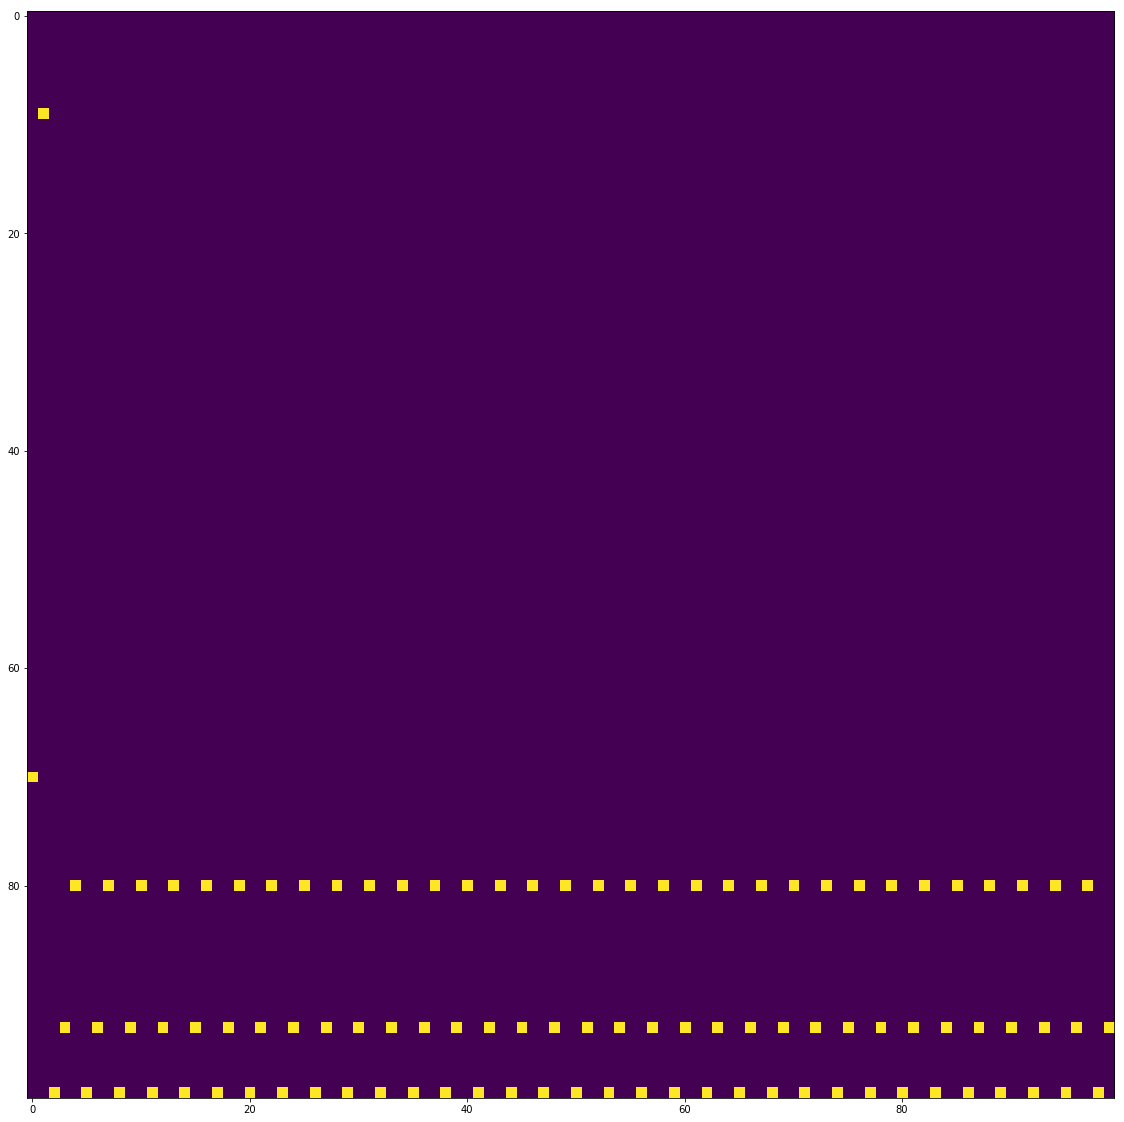

In [744]:
T = 100
X = np.zeros((T,n))


while len(indices) > 0:
    r = np.random.choice(list(indices), size=1, replace=False)[0]

    indices.remove(r)
    X[0, r] = 1

    sp._numActiveColumnsPerInhArea = 1

    for t in range(1,T):
        v       = 1
        vx      = np.zeros((3, n))
        vx[v,:] = X[t-1,:]
        vx = vx.reshape(-1)
        sp.compute(vx, False, X[t])



    img += X
    img = np.clip(img, 0, 1)
plt.figure(figsize=(20,20))
plt.imshow(img.T)